In [63]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [64]:
# data import
d34 = pd.read_csv('data/d2324.csv')
d34.head() # 110 columns

,Unnamed: 0,id,revisit_num,satis_overall,satis_food,satis_shop,satis_nature,satis_history,satis_tradition,satis_gallery,...,info_collect,infra,activity,type,main_purpose,interest1,interest2,interest3,year,satisfaction
0,0,6,4,5,5.0,5.0,NaN,NaN,NaN,NaN,...,1.0,6.0,1.0,1,1,2.0,3.0,4.0,2023,8
1,1,7,4,5,NaN,5.0,5.0,NaN,NaN,NaN,...,3.0,3.0,3.0,1,2,2.0,9.0,7.0,2023,11
2,2,8,2,5,5.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,1,5,NaN,NaN,NaN,2023,1
3,3,10,1,5,NaN,NaN,NaN,5.0,NaN,NaN,...,4.0,NaN,NaN,1,3,NaN,NaN,NaN,2023,15
4,4,11,3,4,5.0,5.0,NaN,5.0,NaN,NaN,...,4.0,3.0,2.0,1,2,8.0,3.0,7.0,2023,2


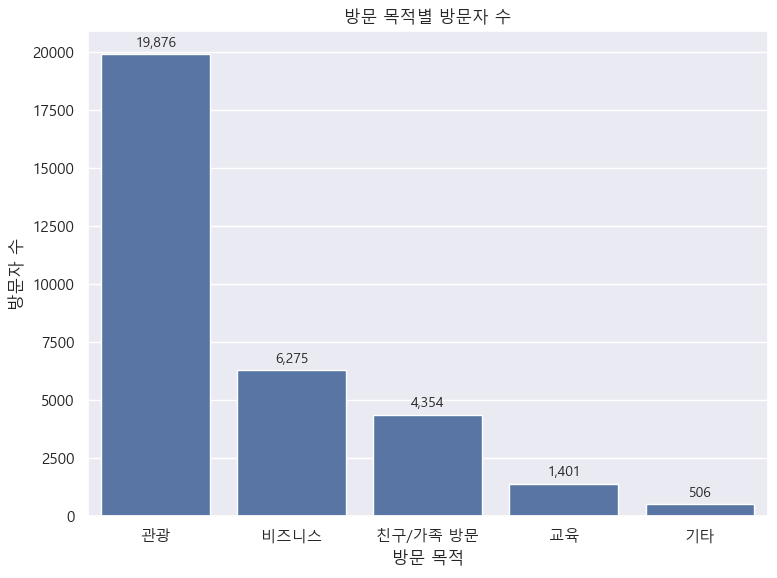

In [65]:
# 방문 목적
d34['purpose'].value_counts()

# purpose
# 여가: 19876
# 사업: 6275
# 방문: 4354
# 교육: 1401
# 기타: 506

purpose_rename = {
    1 : '관광',
    3 : '비즈니스',
    2 : '친구/가족 방문',
    4 : '교육',
    5 : '기타'
}
d34['purpose'] = d34['purpose'].replace(purpose_rename)

# 막대그래프 그리기
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='purpose', data=d34, order=d34['purpose'].value_counts().index)

# 제목 및 축 라벨
plt.title("방문 목적별 방문자 수", fontname='Malgun Gothic')
plt.xlabel("방문 목적", fontname='Malgun Gothic')
plt.ylabel("방문자 수", fontname='Malgun Gothic')
plt.xticks(rotation=0)  # 라벨 회전 없음

# 막대 위에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 200, f'{height:,.0f}', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [66]:
print(d34['purpose'].value_counts())
d34['main_purpose'].value_counts()

purpose
관광          19876
비즈니스         6275
친구/가족 방문     4354
교육           1401
기타            506
Name: count, dtype: int64


main_purpose
1    19876
3     6275
2     4354
4     1401
5      506
Name: count, dtype: int64

lack_info1
교통지정보       3898
맛집정보        2591
금융정보        2533
행사정보        2396
방문지정보       1832
통신이용정보      1747
쇼핑정보        1418
숙박정보        1191
한류문화체험정보     980
기타           224
Name: count, dtype: int64
lack_info2
교통지정보       1886
맛집정보        1819
행사정보        1595
방문지정보       1571
금융정보        1477
통신이용정보      1308
쇼핑정보        1116
숙박정보         888
한류문화체험정보     861
기타            47
Name: count, dtype: int64
lack_info3
방문지정보       1225
교통지정보       1205
맛집정보        1158
행사정보        1083
금융정보         978
통신이용정보       866
쇼핑정보         828
숙박정보         709
한류문화체험정보     677
기타            32
Name: count, dtype: int64


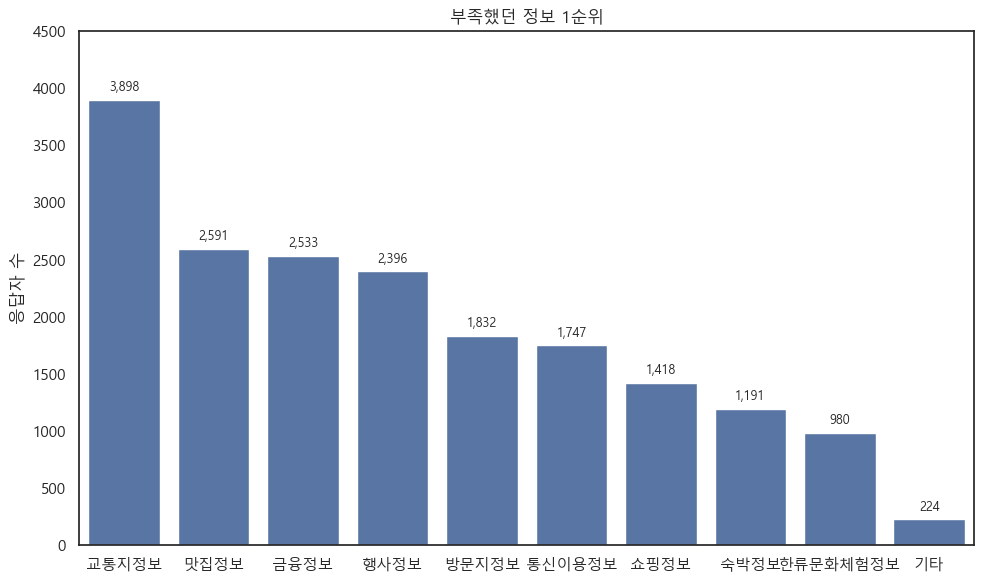

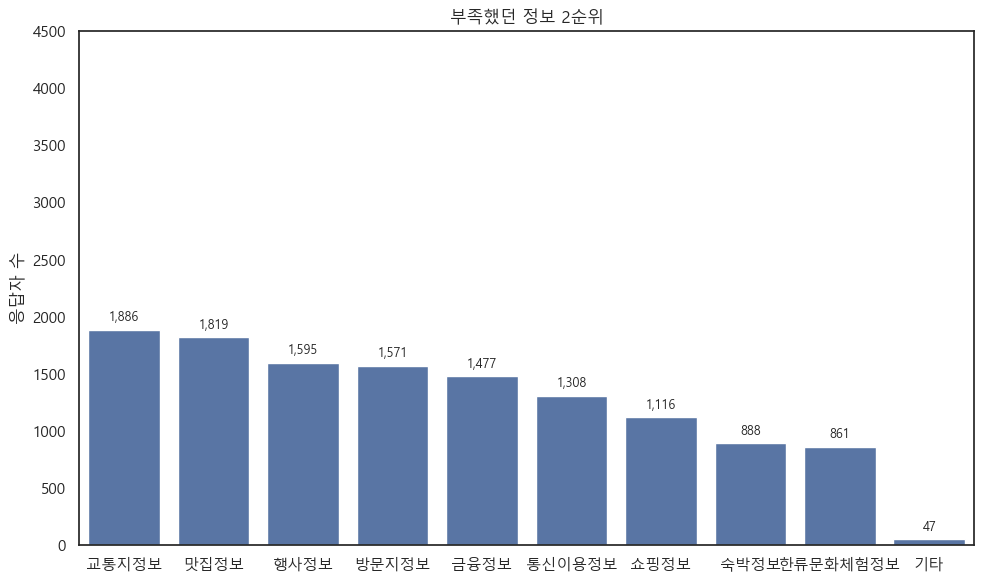

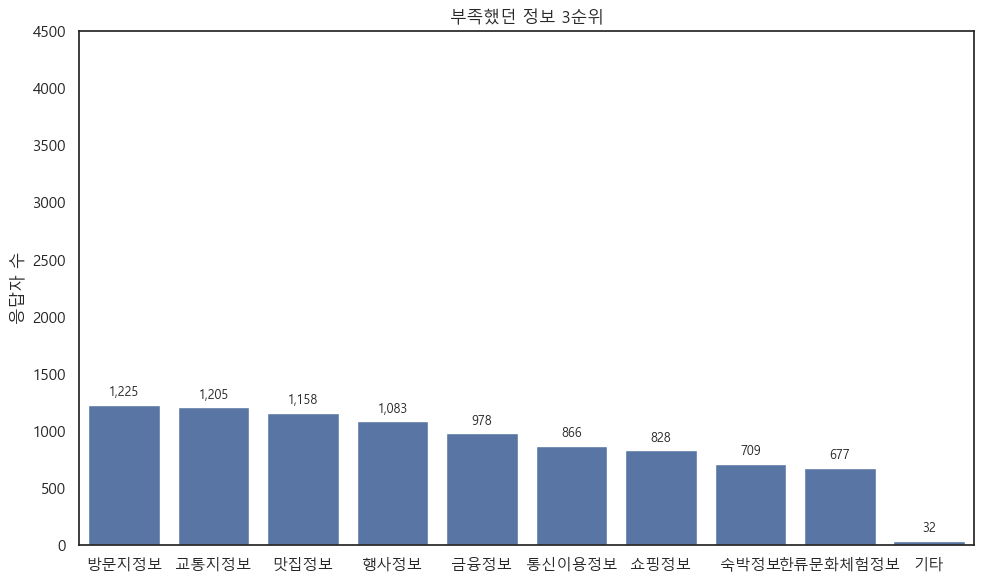

In [67]:
# 정보부족
lackinfo_rename = {
    1 : '방문지정보',
    2 : '교통지정보',
    3 : '맛집정보',
    4 : '쇼핑정보',
    5 : '숙박정보',
    6 : '행사정보',
    7 : '한류문화체험정보',
    8 : '금융정보',
    9 : '통신이용정보',
    10 : '기타',
    11: '없다'
}
d34['lack_info1'] = d34['lack_info1'].replace(lackinfo_rename)
d34['lack_info2'] = d34['lack_info2'].replace(lackinfo_rename)
d34['lack_info3'] = d34['lack_info3'].replace(lackinfo_rename)

print(d34['lack_info1'].value_counts())
print(d34['lack_info2'].value_counts())
print(d34['lack_info3'].value_counts())

mpl.rcParams['font.family'] = ['Malgun Gothic']
mpl.rcParams['font.sans-serif'] = ['Malgun Gothic']
mpl.rcParams['axes.unicode_minus'] = False
sns.set(style="white", font='Malgun Gothic', rc={'axes.unicode_minus':False})

# 1순위 부족 정보
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='lack_info1', data=d34, order=d34['lack_info1'].value_counts().index)
plt.title("부족했던 정보 1순위", fontname='Malgun Gothic')
plt.xlabel("")
plt.ylabel("응답자 수", fontname='Malgun Gothic')
plt.ylim(0, 4500)
plt.xticks(rotation=0)

# 막대 위에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, f'{height:,.0f}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 2순위 부족 정보
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='lack_info2', data=d34, order=d34['lack_info2'].value_counts().index)
plt.title("부족했던 정보 2순위", fontname='Malgun Gothic')
plt.xlabel("")
plt.ylabel("응답자 수", fontname='Malgun Gothic')
plt.ylim(0, 4500)
plt.xticks(rotation=0)

# 막대 위에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, f'{height:,.0f}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 3순위 부족 정보
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='lack_info3', data=d34, order=d34['lack_info3'].value_counts().index)
plt.title("부족했던 정보 3순위", fontname='Malgun Gothic')
plt.xlabel("")
plt.ylabel("응답자 수", fontname='Malgun Gothic')
plt.ylim(0, 4500)
plt.xticks(rotation=0)

# 막대 위에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, f'{height:,.0f}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

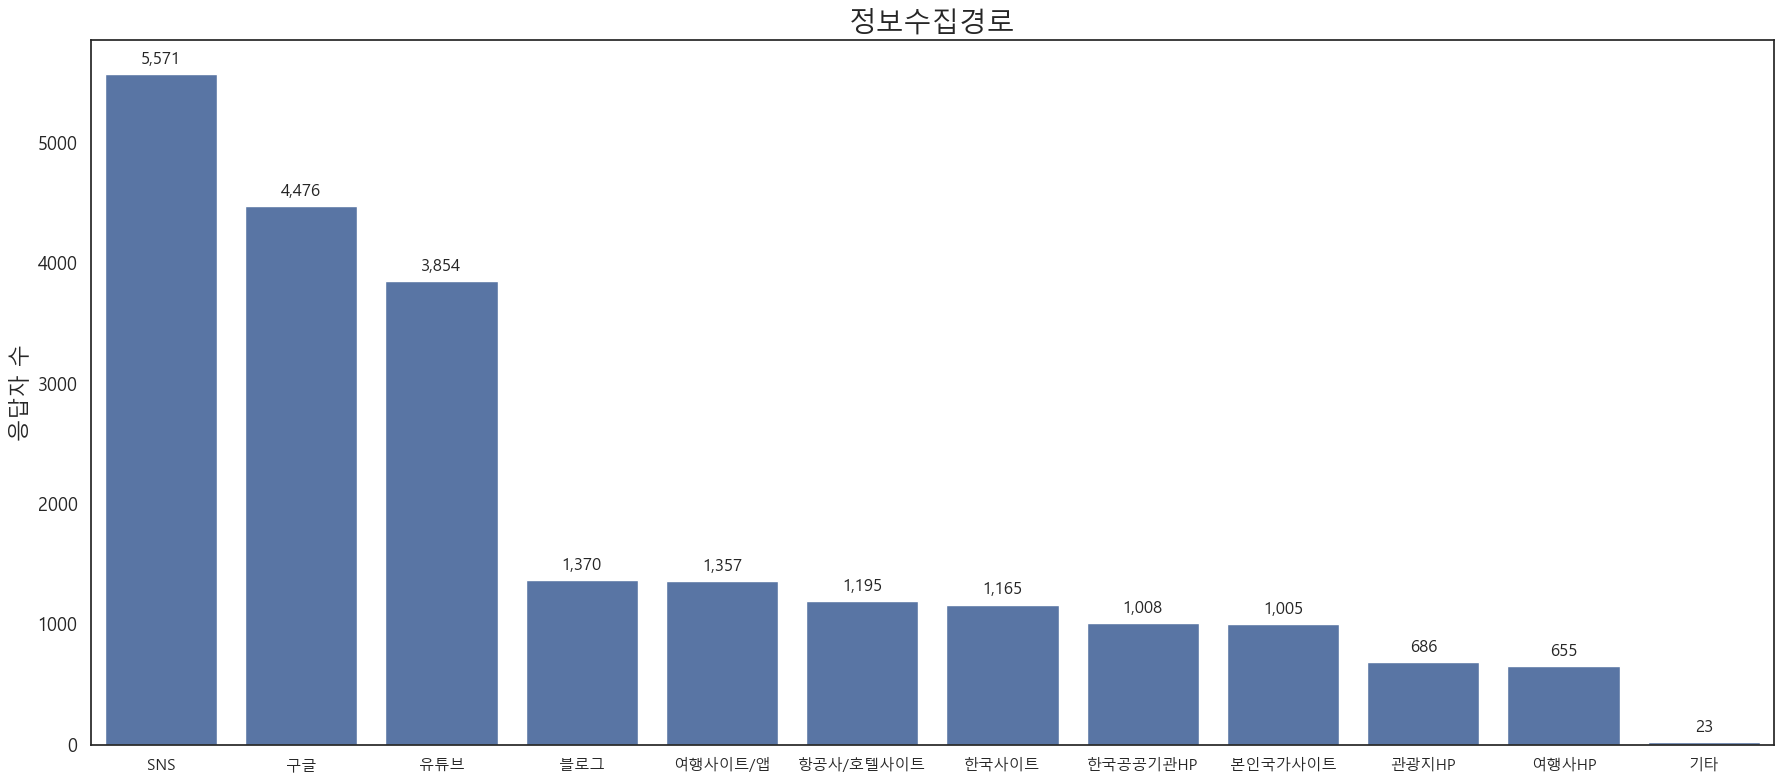

In [68]:
# 줄바꿈 포함된 라벨로 교체
collect_site_rename = {
    1 : '구글',
    2 : '한국사이트',
    3 : '본인국가사이트',
    4 : '여행사이트/앱',
    5 : 'SNS',
    6 : '유튜브',
    7 : '블로그',
    8 : '여행사HP',
    9 : '관광지HP',
    10 : '항공사/호텔사이트',
    11 : '한국공공기관HP',
    12 : '기타'
}
d34['collect_site'] = d34['collect_site'].replace(collect_site_rename)

# 시각화
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='collect_site', data=d34, order=d34['collect_site'].value_counts().index)

# 제목 및 축 설정
plt.title("정보수집경로", fontsize=20)
plt.xlabel("")  
plt.ylabel("응답자 수", fontsize=16)
plt.yticks(fontsize=13)

# 막대 위에 count 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, f'{height:,.0f}',
            ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [69]:
# 고려했던 활동과 실제로 참여했던 활동이 어떻게 다른지 확인
# 매핑: 변수명 → 번호 (중복 응답했던 사람들 때문에 이렇게 넣어놨구나..)
part_map = {
    "part_food": 1,
    "part_shop": 2,
    "part_nature": 3,
    "part_history": 4,
    "part_tradition": 5,
    "part_gallery": 6,
    "part_kpop": 7,
    "part_performance": 8,
    "part_festival": 9,
    "part_fun": 10,
    "part_entertainment": 11,
    "part_beauty": 12,
    "part_heal": 13,
    "part_sport_view": 14,
    "part_sport_part": 15,
    "part_conference": 16,
    "part_business": 17,
    "part_study": 18,
    "part_etc": 19
}

# participant 컬럼 생성
d34['participant'] = d34.apply(
    lambda row: [part_map[col] for col in part_map if row[col] >= 1],
    axis=1
)

d34['participant'].head()
d34.head()

,Unnamed: 0,id,revisit_num,satis_overall,satis_food,satis_shop,satis_nature,satis_history,satis_tradition,satis_gallery,...,infra,activity,type,main_purpose,interest1,interest2,interest3,year,satisfaction,participant
0,0,6,4,5,5.0,5.0,NaN,NaN,NaN,NaN,...,6.0,1.0,1,1,2.0,3.0,4.0,2023,8,"[1, 2, 8]"
1,1,7,4,5,NaN,5.0,5.0,NaN,NaN,NaN,...,3.0,3.0,1,2,2.0,9.0,7.0,2023,11,"[2, 3, 11]"
2,2,8,2,5,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,5,NaN,NaN,NaN,2023,1,[1]
3,3,10,1,5,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,1,3,NaN,NaN,NaN,2023,15,"[4, 15, 16]"
4,4,11,3,4,5.0,5.0,NaN,5.0,NaN,NaN,...,3.0,2.0,1,2,8.0,3.0,7.0,2023,2,"[1, 2, 4]"


In [90]:
# wellness 컬럼 생성
d34['wellness'] = ((d34['part_beauty'] == 12) | (d34['part_nature'] == 3)).astype(int)
print(d34['wellness'].value_counts())

wellness
1    19772
0    12640
Name: count, dtype: int64


In [91]:
# 소비 (general) 
# 코딩된 값들이 있어야 하는데, 숫자로 나와서 어떠한 단위를 기준으로 정했는지 알 수 없음. 
# 분석 하지 않고 넘겨야지
d34.head(3)


,Unnamed: 0,id,revisit_num,satis_overall,satis_food,satis_shop,satis_nature,satis_history,satis_tradition,satis_gallery,...,main_purpose,interest1,interest2,interest3,year,satisfaction,participant,wellness,season,age_label
0,0,6,4,5,5.0,5.0,NaN,NaN,NaN,NaN,...,1,과거 경험 좋음,한국 행사 참여,경비 적합,2023,공연관람,"[1, 2, 8]",0,겨울,NaN
1,1,7,4,5,NaN,5.0,5.0,NaN,NaN,NaN,...,2,과거 경험 좋음,관광지 정보,한국 콘텐츠,2023,놀이공원,"[2, 3, 11]",1,겨울,NaN
2,2,8,2,5,5.0,NaN,NaN,NaN,NaN,NaN,...,5,NaN,NaN,NaN,2023,음식,[1],0,겨울,NaN


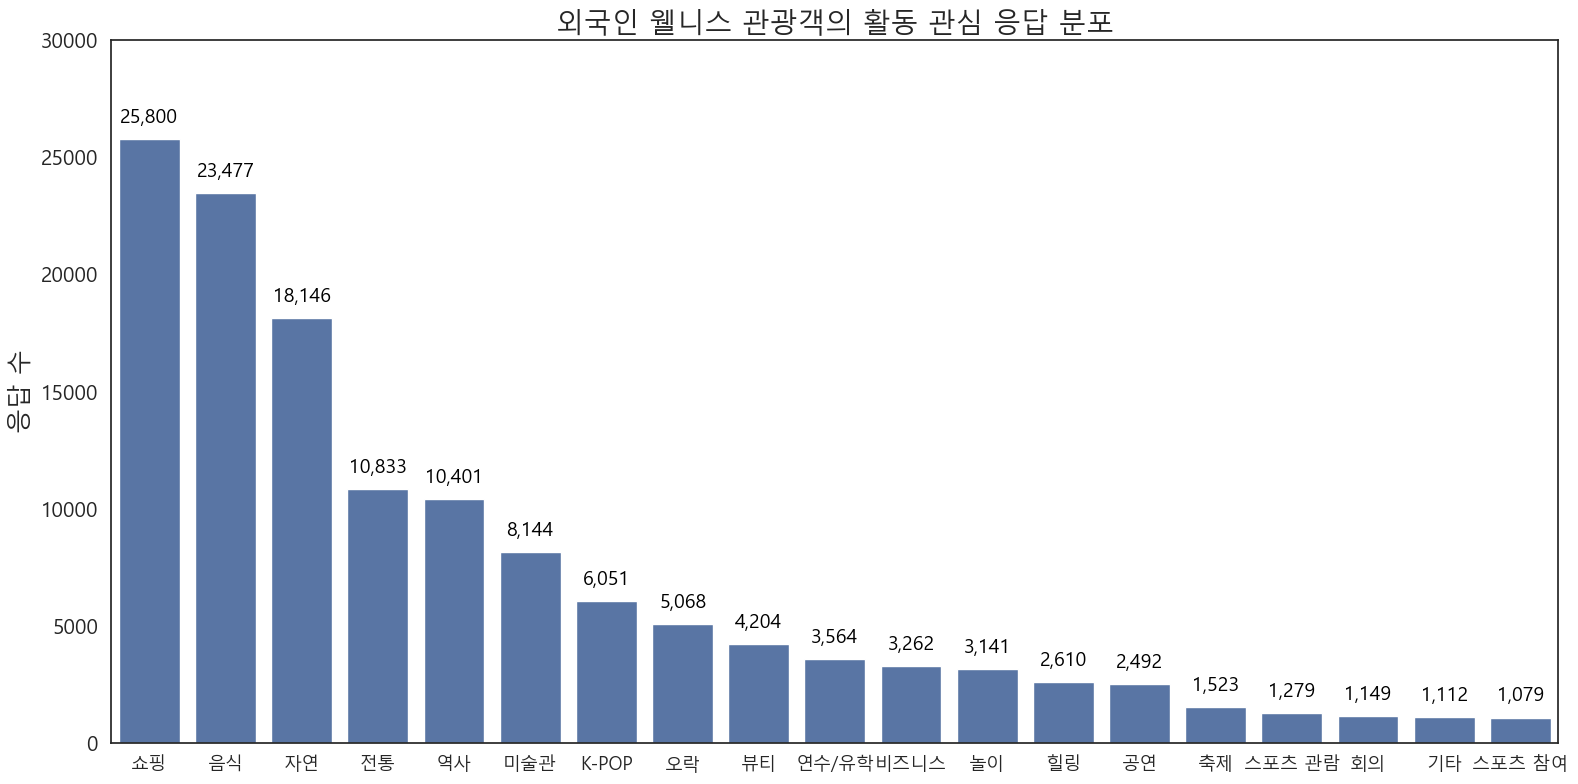

In [92]:
# 만족한 활동 순위 (satisfaction)
d34['satisfaction'].value_counts()

satis_rename = {
    1: '음식',
    2: '쇼핑',
    3: '자연경관',
    4: '유적지',
    5: '전통문화체험',
    6: '박물관관람',
    7: '공연장/촬영지 방문',
    8: '공연관람',
    9: '축제참여',
    10: '클럽/카지노',
    11: '놀이공원',
    12: '뷰티',
    13: '치료/건강검진',
    14: '스포츠관람',
    15: '스포츠참가',
    16: '국제회의',
    17: '비즈니스',
    18: '교육연구',
    19: '기타',
    20: '알수없음'
}

d34['satisfaction'] = d34['satisfaction'].replace(satis_rename)
d34['satisfaction'].value_counts()

plt.figure(figsize=(16, 8))  # 넉넉한 크기

ax = sns.barplot(data=df_sorted, x='category_kor', y='count')

plt.title('외국인 웰니스 관광객의 활동 관심 응답 분포', fontsize=20)
plt.xlabel('')  # x축 라벨 제거
plt.ylabel('응답 수', fontsize=18)
plt.ylim(0, 30000)

# x축 라벨 크기 크게 + 가독성 좋은 회전 및 정렬
plt.xticks(rotation=0, ha='center', fontsize=13)
plt.yticks(fontsize=15)

# 막대 위에 count 값 올리기 (글자 크기 크게, 위치 약간 위로 조정)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + max(df_sorted['count']) * 0.02,  # 약간 위로 띄움
            f'{int(height):,}', ha='center', va='bottom', fontsize=14, color='black')

plt.tight_layout()
plt.show()


In [74]:
# 만족도 점수
# print(d34['satis_nature'].value_counts())
# print(d34['satis_beauty'].value_counts())

satis_cols = [
    'satis_food', 'satis_shop', 'satis_nature', 'satis_history', 
    'satis_gallery', 'satis_tradition', 'satis_kpop', 'satis_performance',
    'satis_festival', 'satis_fun', 'satis_entertainment', 'satis_beauty', 'satis_heal',
    'satis_sport_view', 'satis_sport_part', 'satis_immigration',
    'satis_safe', 'satis_expense', 'satis_sleep', 'satis_transportation',
    'satis_map', 'satis_guide_public', 'satis_mobile', 'satis_guide_digital',
    'satis_guide_private', 'satis_communication'
]

# 결과 저장용 딕셔너리
satis_avg_result = {}

# 각 항목별로 평균 점수 계산
for col in satis_cols:
    vc = d34[col].value_counts()
    total_score = sum(score * count for score, count in vc.items())
    total_people = vc.sum()
    avg_score = total_score / total_people if total_people > 0 else None
    satis_avg_result[col] = round(avg_score, 2)

# 결과를 데이터프레임으로 정리
satis_avg_df = pd.DataFrame.from_dict(satis_avg_result, orient='index', columns=['avg_score']).sort_values(by='avg_score', ascending=False)

rename_dict = {
    'satis_mobile': '모바일/인터넷편의',
    'satis_guide_digital': '디지털관광정보',
    'satis_guide_private': '여행사/가이드',
    'satis_nature': '자연환경',
    'satis_tradition': '전통문화체험',
    'satis_history': '역사유산',
    'satis_heal': '치료/건강검진',
    'satis_gallery': '박물관/미술관',
    'satis_kpop': 'K-POP',
    'satis_guide_public': '관광안내서비스',
    'satis_performance': '공연',
    'satis_sport_view': '스포츠관람',
    'satis_food': '음식',
    'satis_shop': '쇼핑',
    'satis_beauty': '뷰티',
    'satis_festival': '축제',
    'satis_sport_part': '스포츠참여',
    'satis_entertainment': '엔터테인먼트',
    'satis_fun': '유흥',
    'satis_transportation': '교통',
    'satis_expense': '비용',
    'satis_immigration': '입국절차',
    'satis_sleep': '숙박',
    'satis_safe': '안전',
    'satis_map': '지도정보',
    'satis_communication': '언어소통'
}

# 인덱스 이름 변경
satis_avg_df_renamed = satis_avg_df.rename(index=rename_dict)
print(satis_avg_df_renamed)

           avg_score
모바일/인터넷편의       4.87
디지털관광정보         4.86
여행사/가이드         4.83
자연환경            4.69
전통문화체험          4.67
역사유산            4.66
치료/건강검진         4.65
박물관/미술관         4.64
K-POP           4.64
관광안내서비스         4.64
공연              4.63
음식              4.58
쇼핑              4.58
스포츠관람           4.58
뷰티              4.57
축제              4.57
스포츠참여           4.56
엔터테인먼트          4.55
유흥              4.54
교통              4.49
비용              4.48
입국절차            4.43
숙박              4.40
안전              4.37
지도정보            4.37
언어소통            4.19


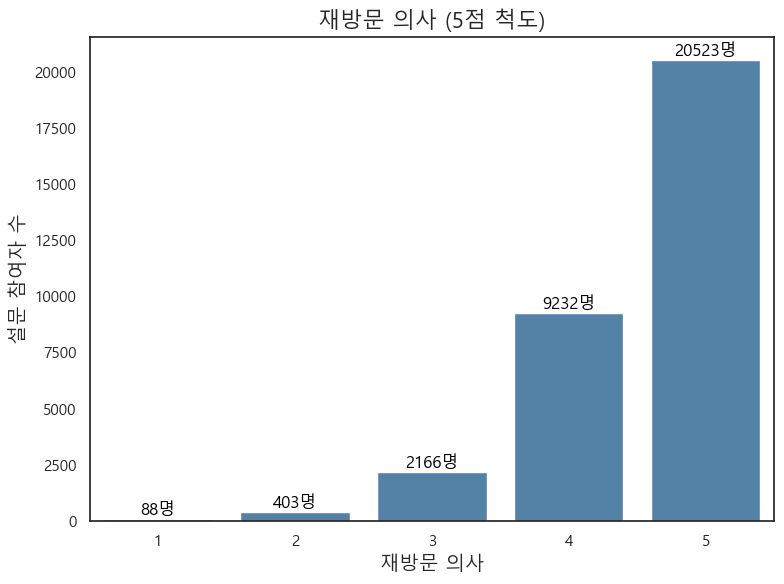

In [ ]:
plt.figure(figsize=(8, 6))

# 단일 파란색 지정 (예: 'steelblue')
ax = sns.countplot(x='revisit_think', data=d34, color='steelblue')

plt.title("재방문 의사 (5점 척도)", fontsize=16)
plt.xlabel("재방문 의사", fontsize=14)
plt.ylabel("설문 참여자 수", fontsize=14)

# 막대 위 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', 
            ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

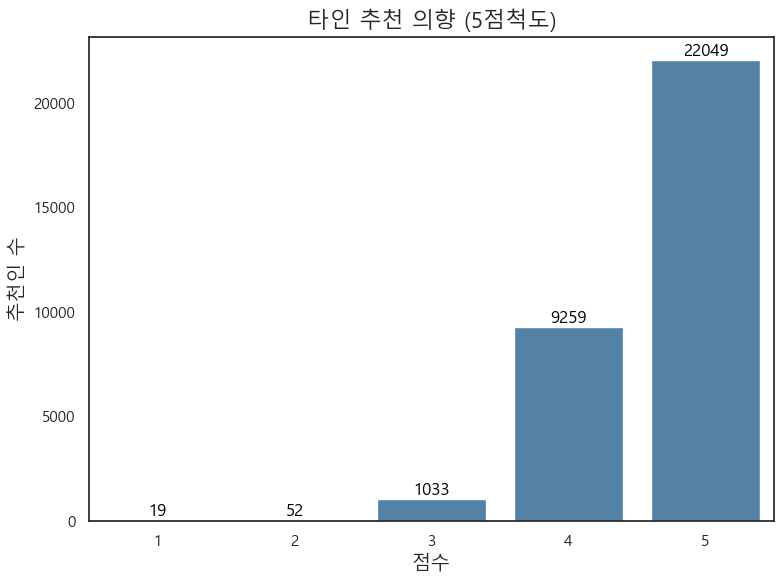

In [96]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='recommend_think', data=d34, color='steelblue')

plt.title("타인 추천 의향 (5점척도)", fontsize=16)
plt.xlabel("점수", fontsize=14)
plt.ylabel("추천인 수", fontsize=14)

# 막대 위에 count 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

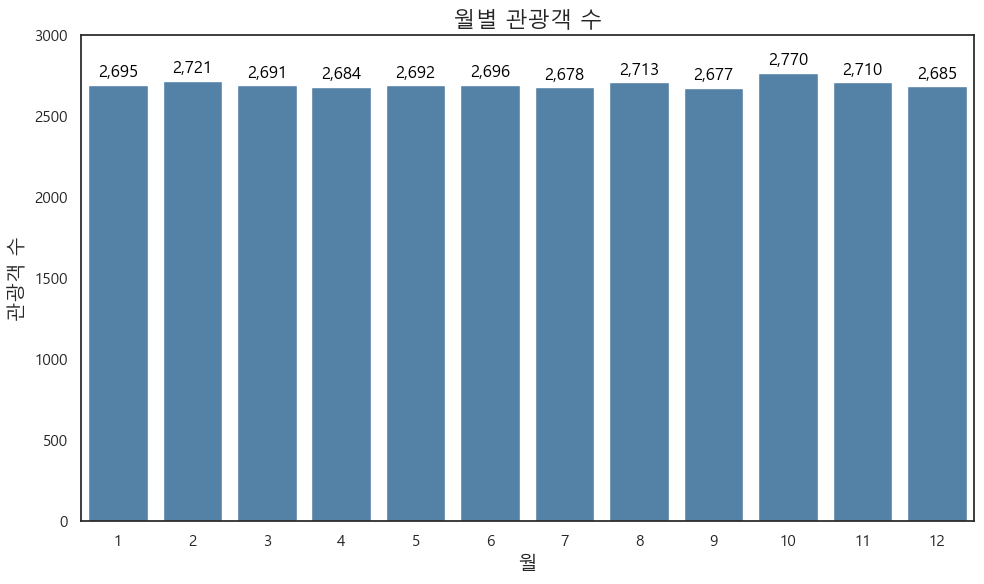

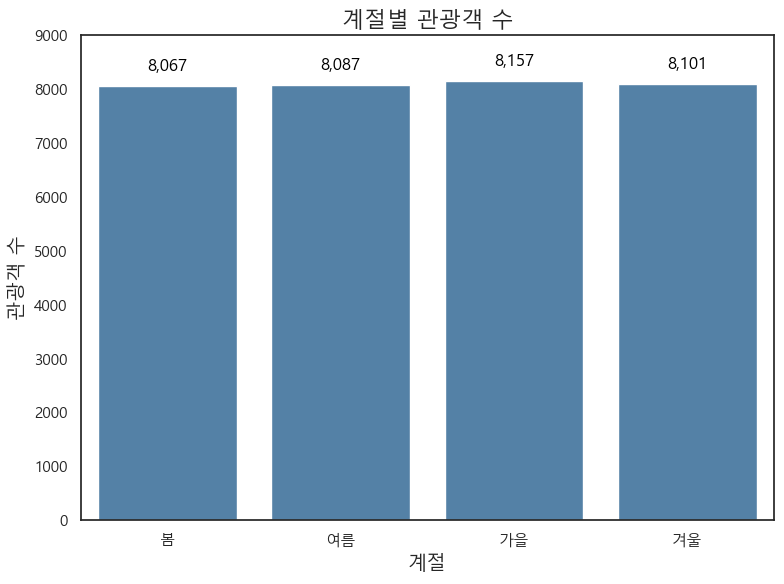

In [99]:
# 계절 함수 정의
def season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    elif month in [12, 1, 2]:
        return '겨울'
    else:
        return 'unknown'

# 계절 컬럼 생성
d34['season'] = d34['month'].apply(season)

# 계절 순서 지정 (카테고리 타입)
season_order = ['봄', '여름', '가을', '겨울']
d34['season'] = pd.Categorical(d34['season'], categories=season_order, ordered=True)

# 월별 관광객 수 시각화
plt.figure(figsize=(10,6))
month_order = list(range(1,13))
ax = sns.countplot(x='month', data=d34, order=month_order, color='steelblue')

plt.title("월별 관광객 수", fontsize=16)
plt.xlabel("월", fontsize=14)
plt.ylabel("관광객 수", fontsize=14)
plt.ylim(0, 3000)

# 막대 위 명수 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 20, f'{int(height):,}',
            ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()


# 계절별 관광객 수 시각화
plt.figure(figsize=(8,6))
ax = sns.countplot(x='season', data=d34, order=season_order, color='steelblue')

plt.title("계절별 관광객 수", fontsize=16)
plt.xlabel("계절", fontsize=14)
plt.ylabel("관광객 수", fontsize=14)
plt.ylim(0, 9000)

# 막대 위 명수 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 200, f'{int(height):,}',
            ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

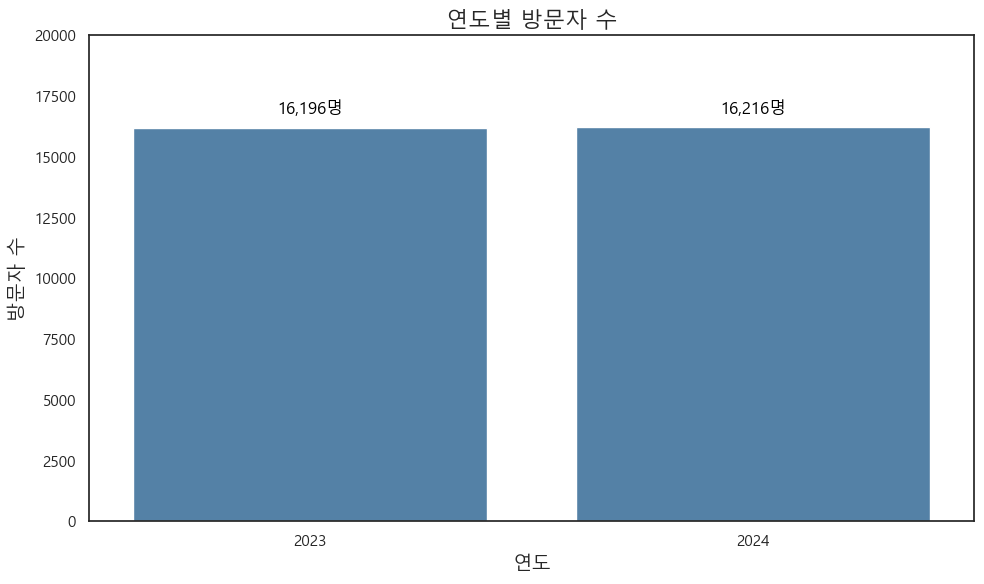

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='year', data=d34, color='steelblue')

plt.title("연도별 방문자 수", fontsize=16)
plt.xlabel("연도", fontsize=14)
plt.ylabel("방문자 수", fontsize=14)
plt.ylim(0, 20000)

# 막대 위에 숫자 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 400,  # 숫자 위치를 막대 위로 조금 띄움
        f'{int(height):,}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        color='black'
    )

plt.tight_layout()
plt.show()

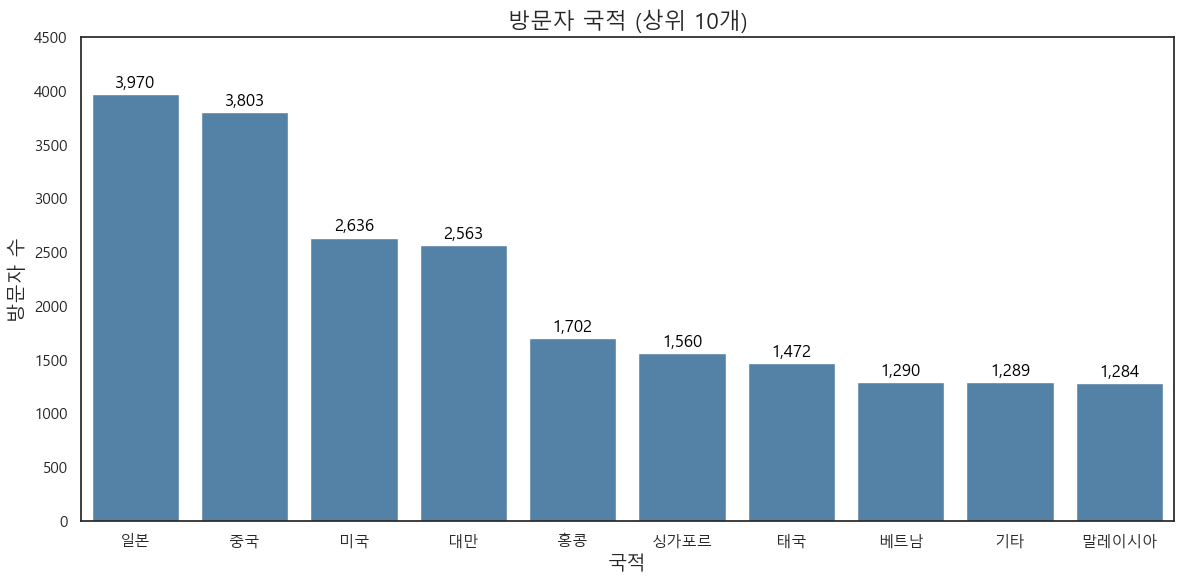

In [108]:
# 상위 10개 국적 추출
top10_nations = d34['nationality'].value_counts().nlargest(10).index

plt.figure(figsize=(12,6))
ax = sns.countplot(x='nationality', data=d34, order=top10_nations, color='steelblue')

plt.title('방문자 국적 (상위 10개)', fontsize=16)
plt.xlabel('국적', fontsize=14)
plt.ylabel('방문자 수', fontsize=14)
plt.ylim(0, 4500)

# 막대 위 명수 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2., 
        height + 20, 
        f'{int(height):,}',
        ha='center', 
        va='bottom', 
        fontsize=12,
        color='black'
    )

plt.tight_layout()
plt.show()

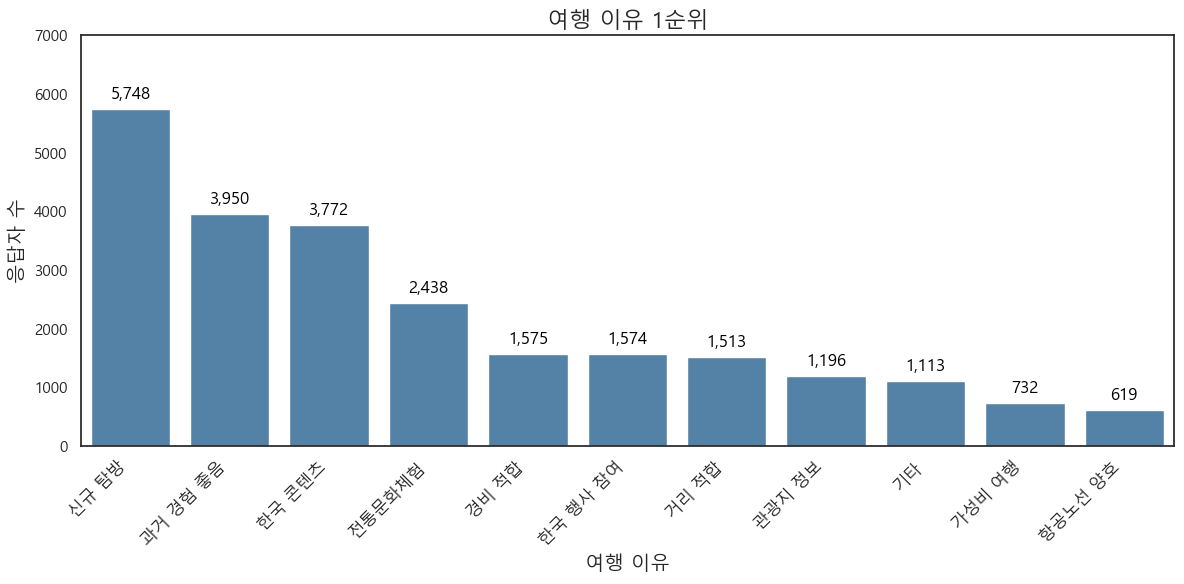

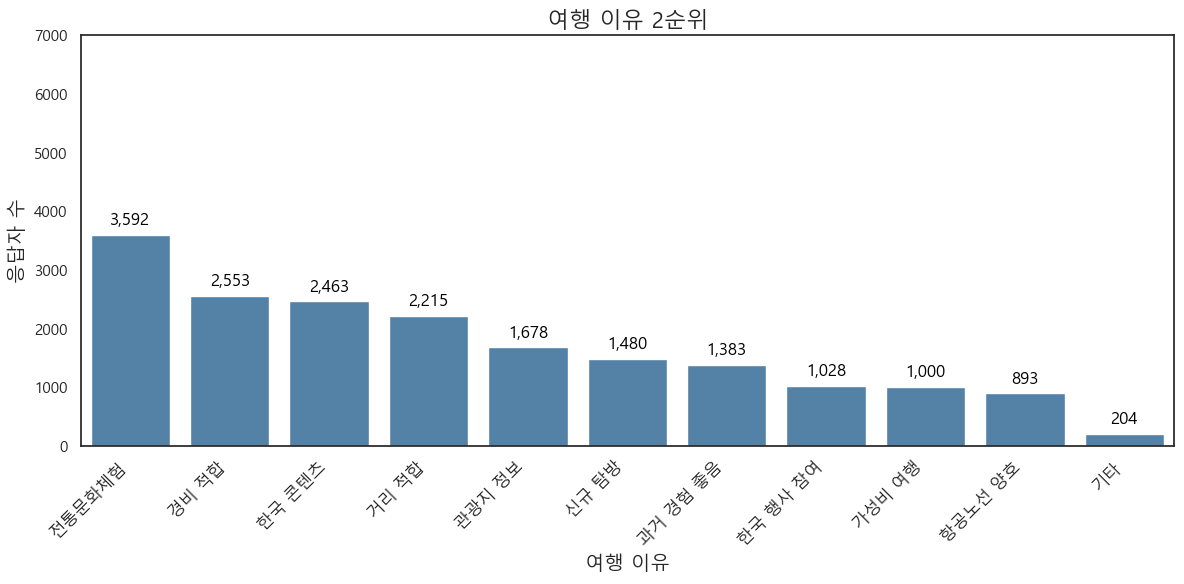

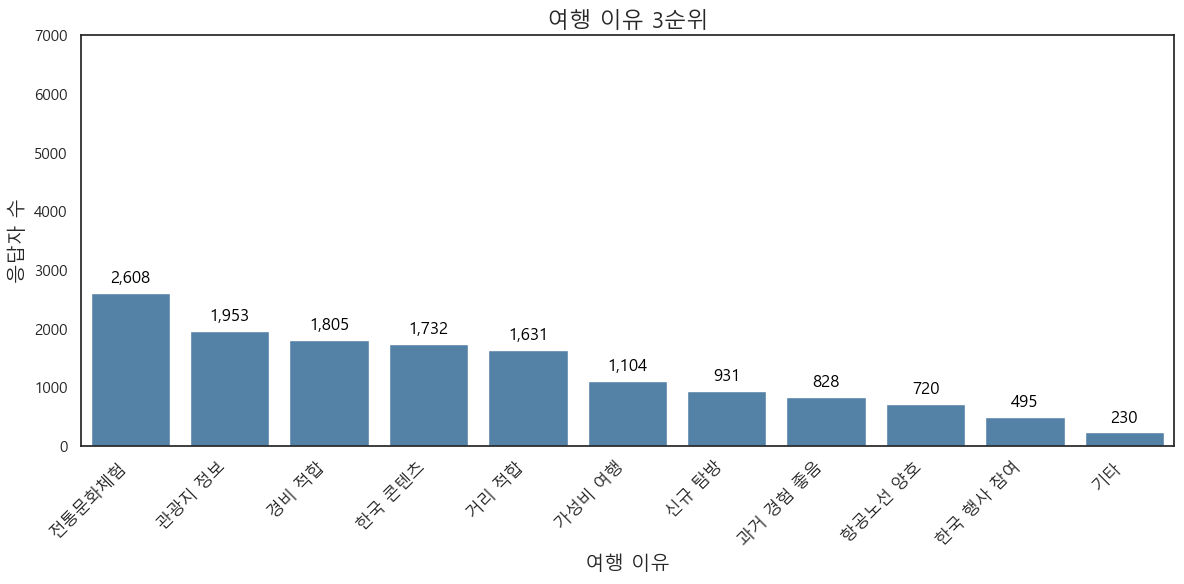

In [104]:
# 한글 폰트 설정
mpl.rcParams['font.family'] = ['Malgun Gothic']
mpl.rcParams['axes.unicode_minus'] = False
sns.set(style="white", font='Malgun Gothic', rc={'axes.unicode_minus':False})

interest_rename = {
    1: "신규 탐방",
    2: "과거 경험 좋음",
    3: "한국 행사 참여",
    4: "경비 적합",
    5: "거리 적합",
    6: "항공노선 양호",
    7: "한국 콘텐츠",
    8: "전통문화체험",
    9: "관광지 정보",
    10: "가성비 여행",
    11: "기타"
}

# 치환
for col in ['interest1', 'interest2', 'interest3']:
    d34[col] = d34[col].replace(interest_rename)

# 시각화 함수
def plot_interest(col, title):
    order = d34[col].value_counts().index
    plt.figure(figsize=(12,6))
    ax = sns.countplot(x=col, data=d34, order=order, color='steelblue')
    plt.title(title, fontsize=16)
    plt.xlabel("여행 이유", fontsize=14)
    plt.ylabel("응답자 수", fontsize=14)
    plt.ylim(0, 7000)

    # 막대 위 값 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 100, f'{int(height):,}',
                ha='center', va='bottom', fontsize=12, color='black')

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()

# 1순위
plot_interest('interest1', "여행 이유 1순위")

# 2순위
plot_interest('interest2', "여행 이유 2순위")

# 3순위
plot_interest('interest3', "여행 이유 3순위")

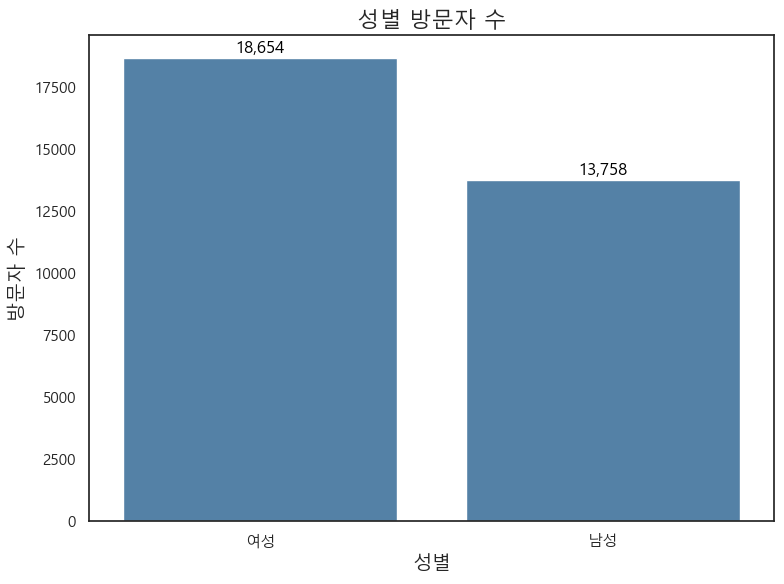

In [101]:
d34['sex'].value_counts()
# 성별
# 남성(1) : 13758명
# 여성(2) : 19654명

sex_rename = {
    1 : '남성',
    2 : '여성'
}

d34['sex'] = d34['sex'].replace(sex_rename)

mpl.rcParams['font.family'] = ['Malgun Gothic']
mpl.rcParams['font.sans-serif'] = ['Malgun Gothic']
mpl.rcParams['axes.unicode_minus'] = False
sns.set(style="white", font='Malgun Gothic', rc={'axes.unicode_minus':False})

plt.figure(figsize=(8,6))
ax = sns.countplot(x='sex', data=d34, color='steelblue')

plt.title("성별 방문자 수", fontsize=16)
plt.xlabel("성별", fontsize=14)
plt.ylabel("방문자 수", fontsize=14)

# 막대 위 숫자만 표시 (명 제외)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 50,  # 숫자 위치 약간 띄움
        f'{int(height):,}',  # '명' 제외
        ha='center', 
        va='bottom', 
        fontsize=12, 
        color='black'
    )

plt.tight_layout()
plt.show()

In [82]:
d34['age'].value_counts()

age
2    10909
3     8577
4     5602
5     5015
6     1501
1      808
Name: count, dtype: int64

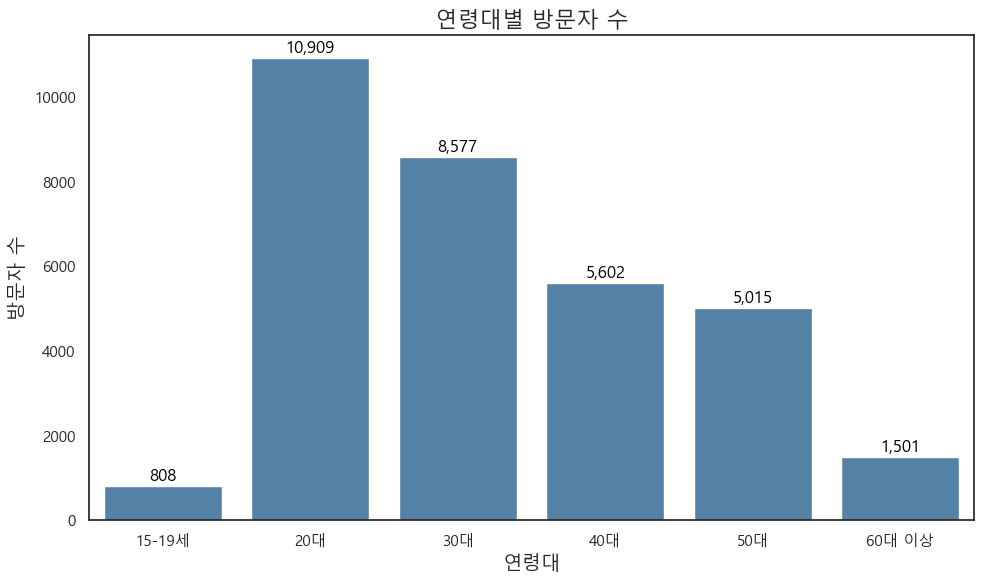

In [102]:
age_rename = {
    1: '15-19세',
    2: '20대',
    3: '30대',
    4: '40대',
    5: '50대',
    6: '60대 이상'
}

d34['age'] = d34['age'].replace(age_rename)
age_order = ['15-19세', '20대', '30대', '40대', '50대', '60대 이상']

# 한글 폰트 설정
mpl.rcParams['font.family'] = ['Malgun Gothic']
mpl.rcParams['axes.unicode_minus'] = False
sns.set(style="white", font='Malgun Gothic', rc={'axes.unicode_minus':False})

plt.figure(figsize=(10,6))
ax = sns.countplot(x='age', data=d34, order=age_order, color='steelblue')

plt.title("연령대별 방문자 수", fontsize=16)
plt.xlabel("연령대", fontsize=14)
plt.ylabel("방문자 수", fontsize=14)

# 막대 위에 방문자 수 표시 (숫자만)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2., 
        height + 30, 
        f'{int(height):,}', 
        ha='center', 
        va='bottom', 
        fontsize=12,
        color='black'
    )

plt.tight_layout()
plt.show()